In [68]:
# Загрузка зависимостей
import numpy
import pandas
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

In [94]:
# Загрузка подготовленного набора данных
dataset = pandas.read_csv('prepared_data.csv') # Убедиться в правильности пути к файлу!
dataset.head(10) # Вывод первых 10 строк

,tpsa,saacc,h-050,mlogp,rdchi,gats1p,nn,c-040,lc50
0,0.514570,0.411306,0.000000,0.019635,-1.875809,-0.955340,0.001262,0.00000,-0.455071
1,0.514570,0.411306,0.000000,0.159062,-1.554684,-1.066755,0.001262,0.00000,-0.093061
2,0.123412,0.107901,0.000000,1.745911,0.652219,-1.568754,0.001262,0.00000,1.307301
3,0.123412,0.107901,0.000000,1.598251,0.599535,-1.535789,0.001262,0.00000,1.168207
4,0.123412,0.107901,0.000000,0.954059,0.439081,-0.868297,0.001262,0.00000,0.804428
5,1.000000,1.000000,0.375897,-2.248683,2.363947,0.778006,0.001262,0.85619,0.847093
6,0.123412,0.107901,0.000000,0.211611,-0.134453,0.392174,0.001262,0.00000,1.453502
7,0.514570,0.411306,0.000000,0.530092,-0.138569,-0.110742,0.001262,0.00000,-0.231058
8,0.514570,0.411306,0.000000,-0.218431,-0.894383,0.590631,0.001262,0.00000,-0.328732
9,0.514570,0.411306,0.000000,0.225688,-1.105498,0.925043,0.001262,0.00000,-0.411327


In [95]:
Xx = dataset.iloc[:, [*range(0,8)]] 
Xx.head(10)

,tpsa,saacc,h-050,mlogp,rdchi,gats1p,nn,c-040
0,0.514570,0.411306,0.000000,0.019635,-1.875809,-0.955340,0.001262,0.00000
1,0.514570,0.411306,0.000000,0.159062,-1.554684,-1.066755,0.001262,0.00000
2,0.123412,0.107901,0.000000,1.745911,0.652219,-1.568754,0.001262,0.00000
3,0.123412,0.107901,0.000000,1.598251,0.599535,-1.535789,0.001262,0.00000
4,0.123412,0.107901,0.000000,0.954059,0.439081,-0.868297,0.001262,0.00000
5,1.000000,1.000000,0.375897,-2.248683,2.363947,0.778006,0.001262,0.85619
6,0.123412,0.107901,0.000000,0.211611,-0.134453,0.392174,0.001262,0.00000
7,0.514570,0.411306,0.000000,0.530092,-0.138569,-0.110742,0.001262,0.00000
8,0.514570,0.411306,0.000000,-0.218431,-0.894383,0.590631,0.001262,0.00000
9,0.514570,0.411306,0.000000,0.225688,-1.105498,0.925043,0.001262,0.00000


In [96]:
# Выделение входных и выходных параметров:
# Выходной параметр - значение столбца обработанного набора данных, соответсвующее столбцу №8 из первоначального набора данных (machine.data.csv).
# Входные параметры - все остальные столбцы обработанного набора данных.
# Используем .values, чтобы индексы не попали в новые переменные и в дальнейшем не мешали нам, например, при построении графиков.
X = dataset.iloc[:, [*range(0,8)]].values
Y = dataset['lc50'].values

# Обратите внимание на структуру вашего обработанного файлы и измените индексы, если нужно.

In [119]:
# Разделение данных на обучающую и тестовую выборки:
# Используем метод train_test_split библиотеки sklearn.
# Он разделяет заданные массивы входных и выходных параметров на две части каждый.
# Значение test_size определяет долю тестовой выборки в исходных данных.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1)

In [120]:
# Задаем параметры структуры нейронной сети.

# Количество нейронов во входном слое должно быть равно количеству входных параметров.
input_layer_size = 8

# Количество нейронов в каждом скрытом слое и количество таких слоёв могут быть выбраны произвольно.
# Увеличение числа нейронов относительно предыдущего слоя позволяет лучше обрабатывать отдельные примеры.
# Уменьшение числа нейронов относительно предыдущего слоя позволяет обощать информацию и выводить новые правила.
# Увеличение числа слоёв помогает сети работать как более сложная функция.
first_hidden_layer_size = 6
second_hidden_layer_size = 6

# Количество нейронов в выходном слое должно быть равно количеству выходных параметров.
output_layer_size = 1

# Параметры обучения нейронной сети: количество эпох и размер батча.
epochs_number = 50
batch_size = 8

In [121]:
# Создание нейронной сети прямого распространения, пока она пустая, т.е. не содержит слоёв и нейронов.
model = Sequential()

# Входной слой и первый скрытый слой, функция активации - ReLU
model.add(Dense(first_hidden_layer_size, input_dim=input_layer_size, activation='relu'))

# Второй скрытый слой, функция активации - ReLU
model.add(Dense(second_hidden_layer_size, activation='relu'))

# Выходной слой, функция активации - линейная, т.к. решается задача регрессии.
model.add(Dense(output_layer_size, activation='linear'))

In [122]:
# Обзор нейронной сети, теперь в ней есть слои и нейроны.
# Если внимательно посмотреть на количество параметров, т.е. связей между нейронами, то можно увидеть, что автоматически добавлены нейроны смещения.
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_26 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 7         
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


In [123]:
# Настройка нейронной сети.
# Функция потерь (loss) - среднеквадратическая ошибка.
# Оптимизатор (optimizer) - adam (в настоящий момент - это стандартный оптимизатор).
# Указываем метрики средняя абсолютная ошибка (mean_absolute_error) и среднеквадратическая ошиба (mean_squared_error) для дальнейшего анализа.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

In [124]:
# Обучение нейронной сети.
# На вход передаем обучающие и тестовые выборки, количество эпох и размер батча.
# На выходе получаем объект с историей обучения, который далее будем анализировать.
history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=epochs_number, batch_size=batch_size)

Train on 491 samples, validate on 55 samples
Epoch 1/50
491/491 [==============================] - 0s 879us/step - loss: 1.1965 - mean_absolute_error: 0.8372 - mean_squared_error: 1.1965 - val_loss: 0.9859 - val_mean_absolute_error: 0.7463 - val_mean_squared_error: 0.9859
Epoch 2/50
491/491 [==============================] - 0s 685us/step - loss: 0.8919 - mean_absolute_error: 0.7214 - mean_squared_error: 0.8919 - val_loss: 0.8702 - val_mean_absolute_error: 0.7042 - val_mean_squared_error: 0.8702
Epoch 3/50
491/491 [==============================] - 0s 389us/step - loss: 0.7608 - mean_absolute_error: 0.6655 - mean_squared_error: 0.7608 - val_loss: 0.7698 - val_mean_absolute_error: 0.6489 - val_mean_squared_error: 0.7698
Epoch 4/50
491/491 [==============================] - 0s 301us/step - loss: 0.6773 - mean_absolute_error: 0.6246 - mean_squared_error: 0.6773 - val_loss: 0.6940 - val_mean_absolute_error: 0.6146 - val_mean_squared_error: 0.6940
Epoch 5/50
491/491 [=======================

Epoch 37/50
491/491 [==============================] - 0s 367us/step - loss: 0.4910 - mean_absolute_error: 0.5275 - mean_squared_error: 0.4910 - val_loss: 0.5525 - val_mean_absolute_error: 0.5819 - val_mean_squared_error: 0.5525
Epoch 38/50
491/491 [==============================] - 0s 273us/step - loss: 0.4890 - mean_absolute_error: 0.5243 - mean_squared_error: 0.4890 - val_loss: 0.5609 - val_mean_absolute_error: 0.5922 - val_mean_squared_error: 0.5609
Epoch 39/50
491/491 [==============================] - 0s 340us/step - loss: 0.4866 - mean_absolute_error: 0.5241 - mean_squared_error: 0.4866 - val_loss: 0.5549 - val_mean_absolute_error: 0.5861 - val_mean_squared_error: 0.5549
Epoch 40/50
491/491 [==============================] - 0s 275us/step - loss: 0.4853 - mean_absolute_error: 0.5220 - mean_squared_error: 0.4853 - val_loss: 0.5555 - val_mean_absolute_error: 0.5892 - val_mean_squared_error: 0.5555
Epoch 41/50
491/491 [==============================] - 0s 360us/step - loss: 0.4854 

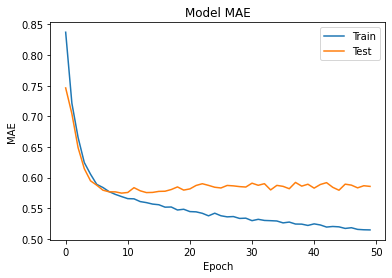

In [125]:
# Выводим динамику среднего абсолютного отклонения от номера эпохи обучения.
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error']) 
plt.title('Model MAE') 
plt.ylabel('MAE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

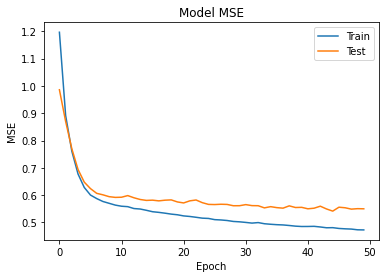

In [126]:
# Выводим динамику среднеквадратического отклонения, т.е. значения функции потерь, от номера эпохи обучения.
# Видно, что в процессе обучения сеть с каждой эпохой вычисляет всё более точные прогнозы значений Y.
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error']) 
plt.title('Model MSE') 
plt.ylabel('MSE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

In [127]:
# Предсказание уже обученной нейронной сети на обучающей выборке:
Y_pred_train = model.predict(X_train).flatten()

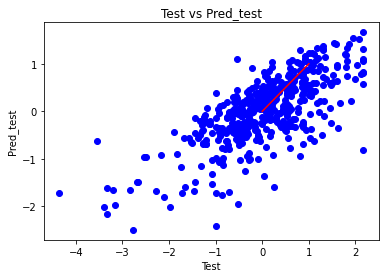

In [128]:
# Сравним эталонные значения Y_train и результат работы обученной нейронной сети Y_pred_train для обучающей выборки.
# В идеальной ситуации они должны совпадать, т.е. точки (Y_train[i], Y_pred_train[i]) должны лежать на прямой Y_train = Y_pred_train.
plt.plot(Y_train, Y_pred_train, 'bo')
plt.plot([0,1], [0,1], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

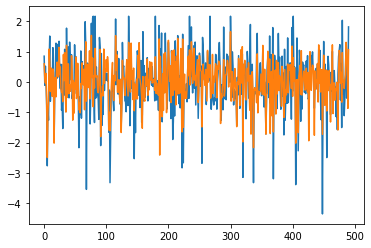

In [129]:
# Выведем сами значения Y_train и Y_pred_train.
plt.plot(Y_train)
plt.plot(Y_pred_train)
plt.show()

In [130]:
# Таким образом, обучение по обучающей выборке проведено.
# Теперь проверим работу нейроной сети на тестовой выборке.

# Предсказание обученной нейронной сети на тестовой выборке:
Y_pred_test = model.predict(X_test).flatten()

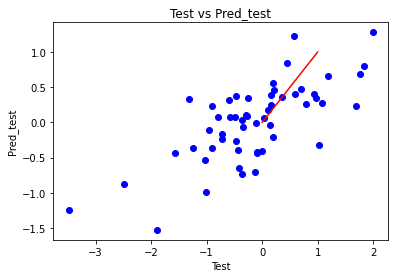

In [131]:
# Сравним эталонные значения Y_test и результат работы обученной нейронной сети Y_pred_test для тестовой выборки.
plt.plot(Y_test, Y_pred_test, 'bo')
plt.plot([0,1], [0,1], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

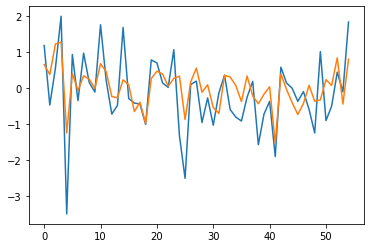

In [132]:
# Выведем сами значения Y_test и Y_pred_test.
plt.plot(Y_test)
plt.plot(Y_pred_test)
plt.show()

In [133]:
# Итого, качество работы нейронной сети на тестовых данных ниже, чем на обучающих - это ожидаемо.
# Тем не менее, нейронная сеть способна найти зависимости и предсказвать значение Y по X с приемлемым уровенм точности.

# Сравним среднеквадратичные ошибки (значения функции потерь) для обучающей и тестовой выборок.
print(numpy.sqrt(mean_squared_error(Y_train, Y_pred_train)))
print(numpy.sqrt(mean_squared_error(Y_test, Y_pred_test)))

0.6845565102111817
0.7417016522991431


In [134]:
# Проверим на нормальное распределение разности пар (Y_train, Y_pred_train), (Y_test, Y_pred_test)
# Для этого используем библиотеку scipy и метод stats.shapiro.
k_train, p_train = stats.shapiro(Y_train - Y_pred_train)
print('Train k = {0}, p = {1}'.format(k_train, p_train))

k_test, p_test = stats.shapiro(Y_test - Y_pred_test)
print('Test k = {0}, p = {1}'.format(k_test, p_test))

Train k = 0.9814032912254333, p = 6.368843514792388e-06
Test k = 0.9862650632858276, p = 0.7810046076774597


In [135]:
# Для полной выборки (Y, Y_pred) применим два статистических теста: shapiro и normaltest.
Y_pred = model.predict(X).flatten()

k_s, p_s = stats.shapiro(Y - Y_pred)
print('k_s = {0}, p_s = {1}'.format(k_s, p_s))

k_n, p_n = stats.normaltest(Y - Y_pred)
print('k_n = {0}, p_n = {1}'.format(k_n, p_n))

k_s = 0.9839653968811035, p_s = 1.0282521543558687e-05
k_n = 19.963694331734924, p_n = 4.623159284032921e-05


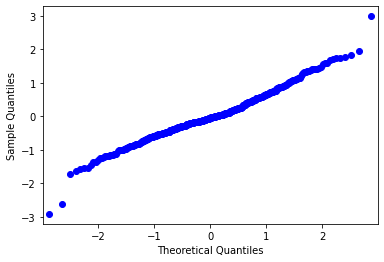

In [136]:
# И тоже самое визуально, с помощью грфиков квантиль-квантиль.
# Обучающая выборка
qqplot(Y_train - Y_pred_train)
plt.show()

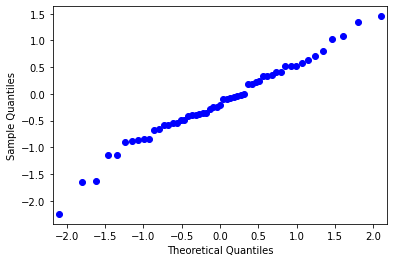

In [137]:
# Тестовая выборка
qqplot(Y_test - Y_pred_test)
plt.show()

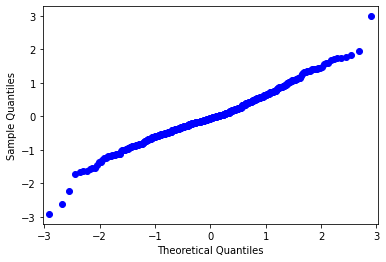

In [138]:
# Полная выборка
qqplot(Y - Y_pred)
plt.show()

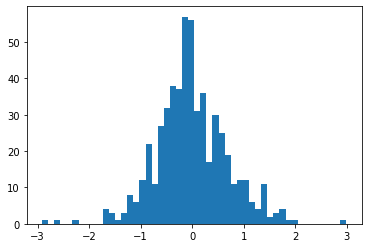

In [139]:
# Можо также визульно убедиться, что распределения "почти нормальное".
plt.hist(Y - Y_pred, bins=50)
plt.show()

In [140]:
# Сохраним обученную нейронную сеть, название файла можно выбрать любое, расширение - h5.
model.save('model3.h5')